In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
import numpy as np
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold


#Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = df.drop('class', axis=1)
y = df['class']

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

[0.77419355 0.74193548 0.77419355 0.70967742 0.93548387 0.90322581
 0.83870968 0.87096774 0.93548387 0.87096774]
[0.87096774 0.70967742 0.93548387 0.70967742 0.83870968 0.90322581
 0.87096774 0.87096774 0.80645161 0.83870968]
{'kNN': [77.0, 74.0, 77.0, 71.0, 94.0, 90.0, 84.0, 87.0, 94.0, 87.0], 'GaussianNB': [87.0, 71.0, 94.0, 71.0, 84.0, 90.0, 87.0, 87.0, 81.0, 84.0]}
    kNN  GaussianNB
0  77.0        87.0
1  74.0        71.0
2  77.0        94.0
3  71.0        71.0
4  94.0        84.0
5  90.0        90.0
6  84.0        87.0
7  87.0        87.0
8  94.0        81.0
9  87.0        84.0


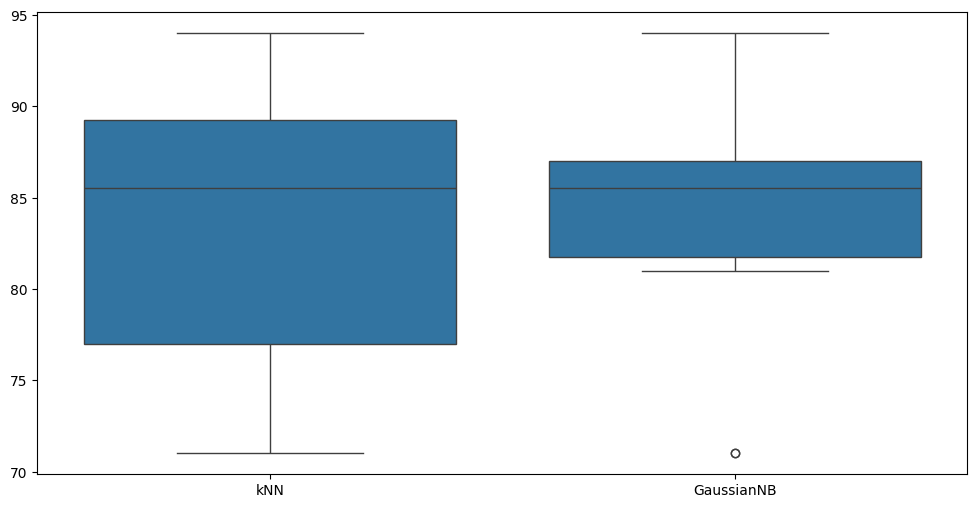

In [67]:
data = {"kNN": [], "GaussianNB": []}

kNN_predictor = KNeighborsClassifier(n_neighbors=5)
Gaussian_predictor = GaussianNB()

kNN_scores = cross_val_score(kNN_predictor, X, y, cv=10, scoring='accuracy')
GaussianNB_scores = cross_val_score(Gaussian_predictor, X, y, cv=10, scoring='accuracy')
print(kNN_scores)
print(GaussianNB_scores)

for i in range(1, 10 + 1):
    data["kNN"].append(round(kNN_scores[i - 1], 2) * 100)
    data["GaussianNB"].append(round(GaussianNB_scores[i - 1], 2) * 100)
    

print(data)
df = pd.DataFrame(data)

print(df)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.show()